In [1]:
title='Gossiping'
latest_index=39491
page_number=40

In [2]:
import os
file_name=f'{os.getcwd()}/{title}-{latest_index-page_number}-{latest_index}.json'

In [3]:
import json 
# Opening JSON file 
print (file_name)
f = open(file_name) 
data = json.load(f) 

/Users/claire/Desktop/tfidf_demo/Gossiping-39451-39491.json


In [4]:
import pandas as pd  
article_df=pd.json_normalize(data['articles'])
article_df.head(2)

,article_id,article_title,author,board,content,date,ip,messages,url,message_count.all,message_count.boo,message_count.count,message_count.neutral,message_count.push
0,M.1619242323.A.9D0,[問卦] 為啥跆拳道一定要衰人==,sos976431 (淡江金城武),Gossiping,摔其他東西練習不好嗎 像是衰木樁 摔石頭地藏 都行 反正只是練習而已 練個身體健康 幹嘛衰人...,Sat Apr 24 13:32:01 2021,118.165.127.10,"[{'push_content': '你是想說柔道嗎', 'push_ipdatetime'...",https://www.ptt.cc/bbs/Gossiping/M.1619242323....,11,2,1,6,3
1,M.1619242408.A.4DF,Re: [爆卦] 405次太魯閣號撞擊工人監視畫面曝光,UWinKing (優文王OuO♥),Gossiping,: 405次太魯閣號行經宜蘭武塔站時， : 撞上擅入軌道撿拾物品王姓工人。 : 影片聲音來源...,Sat Apr 24 13:33:26 2021,58.114.7.12,"[{'push_content': '低能兒', 'push_ipdatetime': '0...",https://www.ptt.cc/bbs/Gossiping/M.1619242408....,32,2,16,12,18


In [5]:
article_df.index.size
# article_df.info()

784

### 目前同一標題的文章數

In [7]:
count=article_df.groupby('article_title').count()
count[count['article_id']>1]['article_id'].head(5)

article_title
Re: [問卦] 中國人應該沒把台灣人當自己人吧？        2
Re: [問卦] 以後通緝犯可以光明正大的走在路上？       3
Re: [問卦] 你們不生小孩，老了誰照顧???         2
Re: [問卦] 你的小孩對教練哭著下跪求饒,大家反應是?    2
Re: [問卦] 印度快崩潰了，未來人的2062年印度吞併    3
Name: article_id, dtype: int64

In [8]:
# len(pd.unique(article_df['article_title']))
article_df=article_df.groupby(['article_title'],as_index=False). agg({'content': ' ,'.join})
article_df.index.size

646

In [9]:
article_df['text_len']=article_df.content.str.len()

In [10]:
article_df.head(2)

,article_title,content,text_len
0,Re: [問卦] 民主制度還能怎麼改進?,自古以來任何制度都有他的好壞 現在西方(尤其美國)民主制度很大的問題 應該要好好改革，但無法...,550
1,Re: [問卦] Audi為甚麼在台灣賣不好?,不用再問了 今天隔壁版已出現9篇Audi菜單 根本起飛了吧 對了都市傳說住澳底的大都開奧迪 ...,326


## Clean Data

In [11]:
from mynlpwrangler.cleaner import ArticleCleaner
from mynlpwrangler.tokenizer import Tokenizer
import os

In [13]:
col='content'
next_col=f'{col}_new'
cleaned_col='clean_sentence'
tokenized_column='tokenize_word'
ac=ArticleCleaner(col=col,cleaned_col=cleaned_col)
clean_data=ac.clean_data(setence_df=article_df)

In [14]:
clean_data.head(10)

,article_title,content,text_len,clean_sentence
0,Re: [問卦] 民主制度還能怎麼改進?,自古以來任何制度都有他的好壞 現在西方(尤其美國)民主制度很大的問題 應該要好好改革，但無法...,550,自古以來任何制度都有他的好壞 現在西方 尤其美國 民主制度很大的問題 應該要好好改革 但無法...
1,Re: [問卦] Audi為甚麼在台灣賣不好?,不用再問了 今天隔壁版已出現9篇Audi菜單 根本起飛了吧 對了都市傳說住澳底的大都開奧迪 ...,326,不用再問了 今天隔壁版已出現 篇Audi菜單 根本起飛了吧 對了都市傳說住澳底的大都開奧迪 ...
2,Re: [問卦] 中國人應該沒把台灣人當自己人吧？,: 如題 : 每次只要台灣人批評中國 : 中國人就會集體跳針 : 奇怪ㄟ : 中國人平常也會...,1878,如題 每次只要台灣人批評中國 中國人就會集體跳針 奇怪 中國人平常也會...
3,Re: [問卦] 中國能做核子潛艇卻做不出核子航母？,: : 覺得很奇怪 : 中國好像20年前就做出核子動力潛艇 : 結果20年過去 : 正在造的...,601,覺得很奇怪 中國好像 年前就做出核子動力潛艇 結果 年過去 正在造的...
4,Re: [問卦] 人生的重點是什麼？,: 大家覺得人生的重點是什麼？ : 賺錢？戀愛？結婚生子？ : 還是快快樂樂的生活？ : 有...,838,大家覺得人生的重點是什麼 賺錢 戀愛 結婚生子 還是快快樂樂的生活 有...
5,Re: [問卦] 以後通緝犯可以光明正大的走在路上？,: 如題 : 以後通緝犯是不是可以光明正大的走在路上 : 警察要求出示證件 就可以拒絕警察盤...,973,如題 以後通緝犯是不是可以光明正大的走在路上 警察要求出示證件 就可以拒絕警察盤...
6,Re: [問卦] 住家484都很討厭樓下開拉麵店或燒烤?,我住的地方在 4樓 隔壁有一間燒烤，他的煙囪很有心往上架，頂端剛排放在三樓 每天都幫我燒炭自...,349,我住的地方在 樓 隔壁有一間燒烤 他的煙囪很有心往上架 頂端剛排放在三樓 每天都幫我燒炭自...
7,Re: [問卦] 你們不生小孩，老了誰照顧???,: 就會被嘴說老了沒人照顧 : 過年過節沒人聚 生病沒人照顧 : 而且他們以前很窮還是養X個...,574,就會被嘴說老了沒人照顧 過年過節沒人聚 生病沒人照顧 而且他們以前很窮還是養X個...
8,"Re: [問卦] 你的小孩對教練哭著下跪求饒,大家反應是?",: 看新聞小孩這過程有對教練哭著下跪求饒 : 如果是你的小孩或姪子 : 對著教練下跪哭喊著我...,314,看新聞小孩這過程有對教練哭著下跪求饒 如果是你的小孩或姪子 對著教練下跪哭喊著我...
9,Re: [問卦] 便當界的配菜之王是哪個？,: 剛剛跟朋友在討論吃便當最喜歡的配菜是哪一樣？ : 他說有螞蟻上樹他ㄧ定選， : 我說我最...,271,剛剛跟朋友在討論吃便當最喜歡的配菜是哪一樣 他說有螞蟻上樹他 定選 我說我最...


In [15]:
tk=Tokenizer(stop_word_path=f'{os.getcwd()}/stop_word.txt')
tk.tokenize_dataframe(clean_data,sentences_column=cleaned_col,new_generate_column=tokenized_column)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/rz/6gtyl1b52s5b7b2nh1zw6frh0000gn/T/jieba.cache
Loading model cost 0.689 seconds.
Prefix dict has been built successfully.


,article_title,content,text_len,clean_sentence,tokenize_word
0,Re: [問卦] 民主制度還能怎麼改進?,自古以來任何制度都有他的好壞 現在西方(尤其美國)民主制度很大的問題 應該要好好改革，但無法...,550,自古以來任何制度都有他的好壞 現在西方 尤其美國 民主制度很大的問題 應該要好好改革 但無法...,自古 制度 現在 西方 尤其 美國 民主 制度 很大 問題 應該 好好 改革 無法 改革 政...
1,Re: [問卦] Audi為甚麼在台灣賣不好?,不用再問了 今天隔壁版已出現9篇Audi菜單 根本起飛了吧 對了都市傳說住澳底的大都開奧迪 ...,326,不用再問了 今天隔壁版已出現 篇Audi菜單 根本起飛了吧 對了都市傳說住澳底的大都開奧迪 ...,不用 再問 今天 隔壁 出現 audi 菜單 根本 起飛 都市 傳說 澳底 大都 開奧迪 八...
2,Re: [問卦] 中國人應該沒把台灣人當自己人吧？,: 如題 : 每次只要台灣人批評中國 : 中國人就會集體跳針 : 奇怪ㄟ : 中國人平常也會...,1878,如題 每次只要台灣人批評中國 中國人就會集體跳針 奇怪 中國人平常也會...,如題 每次 台灣人 批評 中國 中國人 集體 跳針 奇怪 中國人 平常 自嘲 省份 很多 自...
3,Re: [問卦] 中國能做核子潛艇卻做不出核子航母？,: : 覺得很奇怪 : 中國好像20年前就做出核子動力潛艇 : 結果20年過去 : 正在造的...,601,覺得很奇怪 中國好像 年前就做出核子動力潛艇 結果 年過去 正在造的...,覺得 奇怪 中國 好像 年前 做出 核子 動力 潛艇 年過 正在 航母 要燒 柴油 反應 航...
4,Re: [問卦] 人生的重點是什麼？,: 大家覺得人生的重點是什麼？ : 賺錢？戀愛？結婚生子？ : 還是快快樂樂的生活？ : 有...,838,大家覺得人生的重點是什麼 賺錢 戀愛 結婚生子 還是快快樂樂的生活 有...,覺得 人生 重點 戀愛 婚生子 快快 樂樂 生活 人生 很難 抓到 重點 八卦 好好 活著 ...
...,...,...,...,...,...
641,[爆卦] 日本緊急事態前日各地人潮大爆滿！,日本宣布明天開始進行為期兩週的緊急事態 百貨公司 電影院 主題樂園 全部關閉 餐廳只能營業到...,161,日本宣布明天開始進行為期兩週的緊急事態 百貨公司 電影院 主題樂園 全部關閉 餐廳只能營業到...,日本 宣布 明天 進行 為期 兩週 急事 百貨 公司 影院 主題 樂園 關閉 餐廳 只能 營...
642,[爆卦] 曾文水庫下雨了,https://i.imgur.com/emgAHsR.jpg https://i.imgu...,104,午後熱對流 曾文水庫降雨 準備怒下一波 居民快出來看上帝啊 天祐台南 天祐台灣,午後熱 對流 文水 降雨 準備 一波 居民 快出 上帝 台南 台灣
643,[爆卦] 死亡+1 首例住防疫旅館猝死後檢驗確診,https://www.youtube.com/watch?v=wWjwu9FBHAs ht...,373,今日死亡個案 指揮中心證實為首例住在防疫旅館猝死後檢驗出COVID 死亡個案 死亡個案為...,今日 死亡 個案 指揮 中心 證實 首例 防疫 旅館 猝死 檢驗 covid 死亡 個案 死...
644,[爆卦] 高雄大暴雨啦,就在剛剛過去一小時 高雄桃源、杉林、寶來和甲仙大暴雨 寶山派出所時雨量來到85mm http...,205,就在剛剛過去一小時 高雄桃源 杉林 寶來和甲仙大暴雨 寶山派出所時雨量來到 mm 這樣是不...,剛剛 過去 一小 高雄 桃源 杉林 寶來 甲仙 大暴雨 寶山 派出所 雨量 mm 是不是 不...


In [16]:
clean_result=clean_data

## Count word

In [17]:
import numpy as np
def count_word_in_content(token_series):
    word_vector={}
    for index,text in enumerate(token_series.to_list()):
        word_list=text.split(' ')
        print (word_list)
        for word in word_list:
            if word not in word_vector:
                word_vector[word]={}
                word_vector[word][index]=1
            elif index not in word_vector[word]:
                word_vector[word][index]=1
            else:
                word_vector[word][index]+=1
    word_vector_list=[]
    for word,key in word_vector.items():
        for index,number in key.items():
            word_vector_list.append([word,index,number])
    word_vector_df=pd.DataFrame(data=word_vector_list,columns=['word','index','number'])
    return word_vector_df

In [18]:
word_vector_df=count_word_in_content(clean_result[tokenized_column])

, '隨即', '陸續', '解除', '交通管制', '措施', '續將', '依規定', '程序', '檢討', '施工', '廠商', '相關', '責任', '高雄', 'who', 'care', '疝氣']
['媒體', '來源', '華視', '新聞', '記者', '署名', '朱培妤', '綜合', '報導', '北市', '完整', '新聞', '標題', '華航怨', '公費', '疫苗', '難約', '莊人祥', '榮接', '種數', '華航', '完整', '新聞', '內文', '針對華', '航出', '現機', '師確', '診染疫', '外界', '關注', '機師', '接種', '疫苗', '情況', '華航', '工會', '發聲', '批評', '指揮', '中心', '點名華', '航機', '師施', '疫苗', '速度慢', '檢討', '醫護', '人員', '打率', '指揮', '中心', '發言人', '莊人祥', '回應', '表示', '航空', '機師', '接種疫', '苗人數', '相比', '華航機', '師僅', '名施', '進度', '確實', '華航', '工會籲', '直接', '機場', '接種', '莊人祥', '回應', '華航', '企業', '工會', '指出', '機師', '抱怨', '接種', '公費', '疫苗', '預約', '時間', '時程', '過長', '方便', '建議', '是否', '移至', '機場', '直接', '替機', '組人員', '進行', '疫苗', '接種', '對此', '莊人祥', '表示', '各家', '航空公司', '配合', '醫院', '醫院', '洽談', '名額', '上限', '清楚', '何會', '難以', '安排', '情況', '發生', '莊人祥', '星宇', '航空', '公費', '疫苗', '預約', '沒發', '生類', '問題', '指華', '航應', '配合', '醫院', '討論', '疫苗', '接種', '流程', '更順暢', '莊人祥點', '華航', '機師', '接種', '疫苗', '榮則', '名機師', '接種', '確華航', '接種', '疫苗', '速度', '

In [19]:
content_count_term=word_vector_df.groupby('word').count()['index'].reset_index()
content_count_term=content_count_term.rename(columns={'index':'content_count_term'})

In [20]:
word_vector_df=pd.merge(word_vector_df,content_count_term,on='word',how='left')
word_vector_df.head(5)

,word,index,number,content_count_term
0,自古,0,1,1
1,制度,0,7,10
2,制度,13,2,10
3,制度,51,3,10
4,制度,59,2,10


In [21]:
word_vector_df['tf']=word_vector_df['number']
ttl_info=len(pd.unique(word_vector_df['index']))
word_vector_df['idf']=np.log(ttl_info/word_vector_df['content_count_term'])+1

In [22]:
word_vector_df['tfidf_manual']=word_vector_df['tf']*word_vector_df['idf']

In [23]:
word_vector_df[word_vector_df['index']==0]

,word,index,number,content_count_term,tf,idf,tfidf_manual
0,自古,0,1,1,1,7.470800,7.470800
1,制度,0,7,10,7,5.168214,36.177501
11,現在,0,2,108,2,2.788668,5.577337
119,西方,0,1,6,1,5.679040,5.679040
125,尤其,0,1,19,1,4.526361,4.526361
...,...,...,...,...,...,...,...
1689,操控,0,1,1,1,7.470800,7.470800
1690,是不是,0,1,87,1,3.004891,3.004891
1777,以前,0,1,54,1,3.481815,3.481815
1831,稍稍,0,1,2,1,6.777652,6.777652


## Checkout Count

In [24]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from scipy.sparse import coo_matrix

/Users/claire/opt/miniconda3/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [25]:
tokenized_column='tokenize_word'

In [26]:
###使用sklearn 輸出tf和idf 並和手算做比對
##tf
cv = CountVectorizer()
word_matrix = cv.fit_transform(clean_result[tokenized_column].tolist())
text_dict=dict()
feature_name=cv.get_feature_names()
feature_name_df=pd.DataFrame(data=enumerate(feature_name),columns=['col_index','word'])
tmp=coo_matrix(word_matrix)
tf_df=pd.DataFrame({'index': tmp.row, 'col_index': tmp.col, 'sklear_tf': tmp.data} )[['index', 'col_index', 'sklear_tf']]
td_df=pd.merge(tf_df,feature_name_df,on='col_index',how='left')

In [27]:
###idf
tfidf_transformer = TfidfVectorizer(norm=None, smooth_idf=False )
tfidf_matrix=tfidf_transformer.fit_transform(clean_result[tokenized_column].to_list())
idf_dict=pd.DataFrame(zip(tfidf_transformer.get_feature_names(),tfidf_transformer.idf_),columns=['word','sklearn_idf'])

###tfidf
tmp=coo_matrix(tfidf_matrix)
tf_idf=pd.DataFrame({'index': tmp.row, 'col_index': tmp.col, 'sklearn_tfidf': tmp.data} )[['index', 'col_index', 'sklearn_tfidf']].sort_values(['index', 'col_index'])
tf_idf=pd.merge(tf_idf,feature_name_df,on='col_index',how='left')

In [28]:
##比較
compare_sklearn=pd.merge(word_vector_df,td_df,on=['index','word'],how='outer')
compare_sklearn=pd.merge(compare_sklearn,idf_dict,on='word',how='outer')
compare_sklearn['tfidf']=compare_sklearn['tf']*compare_sklearn['idf']
compare_sklearn=pd.merge(compare_sklearn,tf_idf,on=['index','word'],how='outer')
compare_sklearn[['word','index','tf','idf','tfidf','sklear_tf','sklearn_idf','sklearn_tfidf']]

,word,index,tf,idf,tfidf,sklear_tf,sklearn_idf,sklearn_tfidf
0,自古,0,1,7.470800,7.470800,1,7.470800,7.470800
1,制度,0,7,5.168214,36.177501,7,5.168214,36.177501
2,制度,13,2,5.168214,10.336429,2,5.168214,10.336429
3,制度,51,3,5.168214,15.504643,3,5.168214,15.504643
4,制度,59,2,5.168214,10.336429,2,5.168214,10.336429
...,...,...,...,...,...,...,...,...
43165,雨量,644,1,7.470800,7.470800,1,7.470800,7.470800
43166,mm,644,1,7.470800,7.470800,1,7.470800,7.470800
43167,擔心限水,644,1,7.470800,7.470800,1,7.470800,7.470800
43168,媽祖婆,644,1,7.470800,7.470800,1,7.470800,7.470800


## 使用tfidf

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer
clean_result_df=clean_result[~clean_result[tokenized_column].isnull()]
def textFeatureExtraction(token_data):
    cv = CountVectorizer()
    # 將文字中的詞語轉換為詞頻矩陣，矩陣元素a[i][j] 表示j詞在i類文字下的詞頻
    word_matrix = cv.fit_transform(token_data)
    vocab = pd.DataFrame(cv.get_feature_names(), columns=['word'])
    vocab['col_index'] = vocab.index
    # 統計每一個詞語的tf-idf權值
    tfidf_transformer = TfidfTransformer(norm=None, smooth_idf=False,use_idf=True)
    tfidf_matrix = tfidf_transformer.fit_transform(word_matrix)
    return word_matrix, tfidf_matrix, vocab
word_matrix, tfidf_matrix, vocab = textFeatureExtraction( clean_result_df[tokenized_column])

In [30]:
##將tdidf做整理，
tmp = coo_matrix(tfidf_matrix)
result= pd.DataFrame({'index': tmp.row, 'col_index': tmp.col, 'tfidf': tmp.data} )[['index', 'col_index', 'tfidf']].sort_values(['index', 'col_index'])
tfidf_result = pd.merge(result, vocab, on='col_index', how='left')
tfidf_result = tfidf_result[['index', 'word', 'tfidf']]
tfidf_result.head(2)

,index,word,tfidf
0,0,一個,2.446919
1,0,一套,5.524889


In [31]:
sorted_tf_idf=tfidf_result.sort_values(by='tfidf',ascending=False)
clean_result_df=clean_result_df.reset_index()
clean_result_df['index']=clean_result_df.index
clean_result_df.head(2)

,index,article_title,content,text_len,clean_sentence,tokenize_word
0,0,Re: [問卦] 民主制度還能怎麼改進?,自古以來任何制度都有他的好壞 現在西方(尤其美國)民主制度很大的問題 應該要好好改革，但無法...,550,自古以來任何制度都有他的好壞 現在西方 尤其美國 民主制度很大的問題 應該要好好改革 但無法...,自古 制度 現在 西方 尤其 美國 民主 制度 很大 問題 應該 好好 改革 無法 改革 政...
1,1,Re: [問卦] Audi為甚麼在台灣賣不好?,不用再問了 今天隔壁版已出現9篇Audi菜單 根本起飛了吧 對了都市傳說住澳底的大都開奧迪 ...,326,不用再問了 今天隔壁版已出現 篇Audi菜單 根本起飛了吧 對了都市傳說住澳底的大都開奧迪 ...,不用 再問 今天 隔壁 出現 audi 菜單 根本 起飛 都市 傳說 澳底 大都 開奧迪 八...


In [32]:
result=pd.merge(sorted_tf_idf,clean_result_df[['article_title','index',col,tokenized_column]],how='left',on='index').sort_values(by=['index','tfidf'],ascending=False)
tfidf_Top10=result.groupby('index').head(10)
tfidf_Top10.head(2)

,index,word,tfidf,article_title,content,tokenize_word
2772,645,味道,16.574668,基隆廟口夜市是不是過譽,如題 螃蟹羹味道普通小小一碗70 一口香腸不怎樣排一堆人 營養三明治的東西也很雷 超普 做潤...,如題 螃蟹 味道 普通 小小 一碗 一口 香腸 一堆 營養 三明治 東西 很雷 超普 做潤餅...
4960,645,做潤餅,13.555305,基隆廟口夜市是不是過譽,如題 螃蟹羹味道普通小小一碗70 一口香腸不怎樣排一堆人 營養三明治的東西也很雷 超普 做潤...,如題 螃蟹 味道 普通 小小 一碗 一口 香腸 一堆 營養 三明治 東西 很雷 超普 做潤餅...


In [33]:
##算出最常出現的關鍵字，並且將出現的次數算出來，算出最常被提到的關鍵字出現次數
count_tag=tfidf_Top10.groupby('word').count()
count_tag['index'].sort_values('index',ascending=False).head(10)

word
警察    30
柔道    29
台灣    22
教練    20
盤查    17
問卦    17
肥宅    16
日本    13
知道    12
本肥     9
Name: index, dtype: int64

## 文字雲

In [34]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [35]:
wc = WordCloud(
  background_color='black',        #   背景顏色
  max_words=200,                   #   最大分詞數量
  mask=None,                       #   背景圖片
  max_font_size=None,              #   顯示字體的最大值
  # stopwords=STOPWORDS.add(stopword),   #   使用內置的屏蔽詞，再添加一個
#   font_path=font_path,             #   若為中文則需引入中文字型(.TTF)
  random_state=None,               #   隨機碼生成各分詞顏色
  prefer_horizontal=0.9)           #   調整分詞中水平和垂直的比例

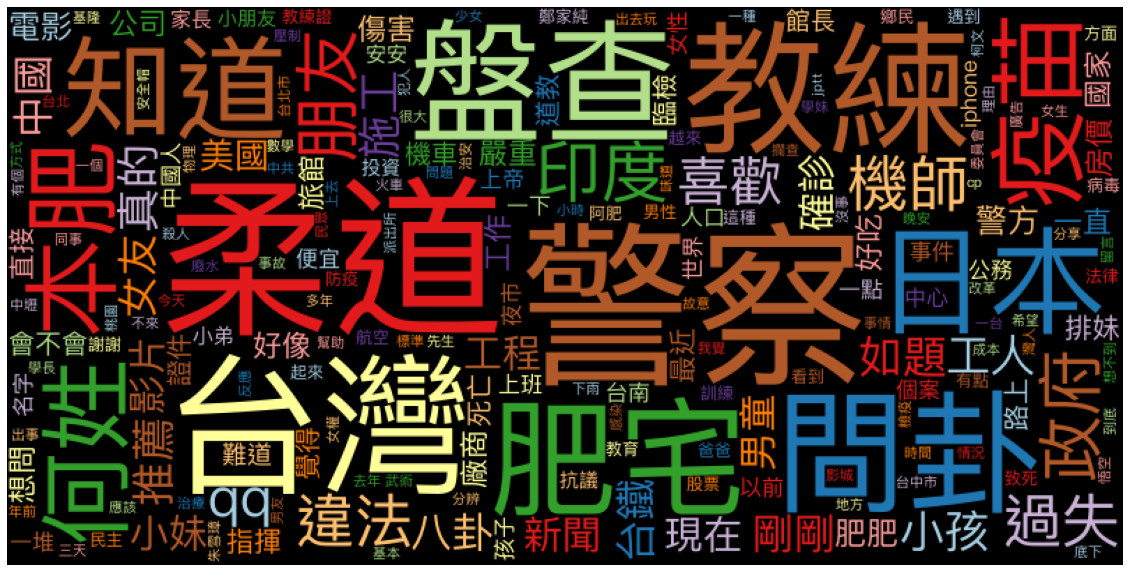

In [36]:
font_path="PingFang.ttc" # 標楷體 #須自行
wc = WordCloud(background_color='black',font_path=font_path,height=400,width=800,colormap='Paired')
wc.fit_words(count_tag['index'].to_dict())
import matplotlib.pyplot as plt
plt.figure(figsize=(20,40))
plt.imshow(wc)
plt.axis("off")
plt.show()


In [37]:
wc .to_file('word_cloud.png')